In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import random

from sklearn.model_selection import KFold
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor

from util import Compare, getError, getdata
from LinearRegression import KfoldLinearRegression
from RandomForest import KfoldRandomForest

In [3]:
df1 = getdata("./data/UseData.csv")
df1

,Day,S,T,K,Value,tau,rate
0,44834.0,2.65,0.24384,2.50,0.2092,0.0191,1.06000
1,44834.0,2.65,0.24384,2.55,0.1734,0.0191,1.03922
2,44834.0,2.65,0.24384,2.60,0.1400,0.0191,1.01923
3,44834.0,2.65,0.24384,2.65,0.1111,0.0191,1.00000
4,44834.0,2.65,0.24384,2.70,0.0882,0.0191,0.98148
...,...,...,...,...,...,...,...
31729,44075.0,3.40,0.15616,3.40,0.1322,0.0250,1.00000
31730,44075.0,3.40,0.15616,3.50,0.0924,0.0250,0.97143
31731,44075.0,3.40,0.15616,3.60,0.0640,0.0250,0.94444
31732,44075.0,3.40,0.15616,3.70,0.0415,0.0250,0.91892


In [53]:
X = df1.drop(["Day", "Value"], axis=1)  # 选择特征值和标签值
Y = df1.Value
X_1 = df1[(df1.rate < 0.95) ].drop(["Day", "Value"], axis=1)
Y_1 = df1[(df1.rate < 0.95) ].Value
X_2 = df1[(df1.rate >= 0.95) & (df1.rate < 1.05)
          ].drop(["Day", "Value"], axis=1)
Y_2 = df1[(df1.rate >= 0.95) & (df1.rate < 1.05)].Value
X_3 = df1[(df1.rate>= 1.05)
          ].drop(["Day", "Value"], axis=1)
Y_3 = df1[(df1.rate >=  1.05)].Value
X_1

,S,T,K,tau,rate
6,2.65,0.24384,2.80,0.0191,0.94643
7,2.65,0.24384,2.85,0.0191,0.92982
8,2.65,0.24384,2.90,0.0191,0.91379
9,2.65,0.24384,2.95,0.0191,0.89831
10,2.65,0.24384,3.00,0.0191,0.88333
...,...,...,...,...,...
31721,3.40,0.55890,3.70,0.0250,0.91892
31723,3.40,0.55890,3.80,0.0250,0.89474
31731,3.40,0.15616,3.60,0.0250,0.94444
31732,3.40,0.15616,3.70,0.0250,0.91892


## 不按照S/K处理数据直接学习

In [54]:
error1 = [0, 0, 0, 0]
temp = []
for train_index, test_index in KFold(n_splits=5, random_state=7, shuffle=True).split(X, Y):
    X_train, X_test = X.iloc[train_index], X.iloc[test_index]
    Y_train, Y_test = Y.iloc[train_index], Y.iloc[test_index]
    model = LinearRegression()
    model.fit(X_train, Y_train)
    predictions = model.predict(X_test)
    predictions[predictions < 0] = random.uniform(0,0.01)
    error1 += getError(predictions, np.array(Y_test))
    Y_test = pd.DataFrame(Y_test)
    Y_test.insert(1,"LRPrediction",predictions)
    temp.append(Y_test)
    
error1 /= 5
print("###############Error of LinearRegression###########")
print("MAE  = ", error1[0])
print("RMSE = ", error1[1])
print("MPE  = ", error1[2])
print("MAPE = ", error1[3])

temp = pd.concat(temp)
df2 =  pd.concat([df1.drop(['Value'],axis=1), temp], axis=1)
df2.dropna()

###############Error of LinearRegression###########
MAE  =  0.028287054251483496
RMSE =  0.0386124333599418
MPE  =  2.078796702467277
MAPE =  2.252980206453416


,Day,S,T,K,tau,rate,Value,LRPrediction
0,44834.0,2.65,0.24384,2.50,0.0191,1.06000,0.2092,0.234633
1,44834.0,2.65,0.24384,2.55,0.0191,1.03922,0.1734,0.196384
2,44834.0,2.65,0.24384,2.60,0.0191,1.01923,0.1400,0.160643
3,44834.0,2.65,0.24384,2.65,0.0191,1.00000,0.1111,0.126835
4,44834.0,2.65,0.24384,2.70,0.0191,0.98148,0.0882,0.094724
...,...,...,...,...,...,...,...,...
31729,44075.0,3.40,0.15616,3.40,0.0250,1.00000,0.1322,0.143083
31730,44075.0,3.40,0.15616,3.50,0.0250,0.97143,0.0924,0.102911
31731,44075.0,3.40,0.15616,3.60,0.0250,0.94444,0.0640,0.066801
31732,44075.0,3.40,0.15616,3.70,0.0250,0.91892,0.0415,0.034982


In [55]:
error2 = [0, 0, 0, 0]
temp=[]
for train_index, test_index in KFold(n_splits=5,shuffle = True,random_state = 17).split(X, Y):
    X_train, X_test = X.iloc[train_index], X.iloc[test_index]
    Y_train, Y_test = Y.iloc[train_index], Y.iloc[test_index]
    model = RandomForestRegressor(
        n_estimators=190,
        max_depth=12,
        max_features='log2',
        random_state=42,
        min_samples_leaf=1
    )
    model.fit(X_train, Y_train)
    predictions = model.predict(X_test)
    predictions[predictions < 0] = random.uniform(0,0.01)
    error2 += getError(predictions, np.array(Y_test))
    Y_test = pd.DataFrame(Y_test)
    Y_test.insert(1,"RFPrediction",predictions)
    temp.append(Y_test)
error2 /=5
print("#############Error of Random Forest################")
print("MAE  = ", error2[0])
print("RMSE = ", error2[1])
print("MPE  = ", error2[2])
print("MAPE = ", error2[3])

temp = pd.concat(temp)
df3 =  pd.concat([df2.drop(['Value'],axis=1), temp], axis=1)
df3.dropna()

#############Error of Random Forest################
MAE  =  0.013984238339611002
RMSE =  0.020674241243774823
MPE  =  0.4916773757632102
MAPE =  0.5813623835454218


,Day,S,T,K,tau,rate,LRPrediction,Value,RFPrediction
0,44834.0,2.65,0.24384,2.50,0.0191,1.06000,0.234633,0.2092,0.214491
1,44834.0,2.65,0.24384,2.55,0.0191,1.03922,0.196384,0.1734,0.180239
2,44834.0,2.65,0.24384,2.60,0.0191,1.01923,0.160643,0.1400,0.147240
3,44834.0,2.65,0.24384,2.65,0.0191,1.00000,0.126835,0.1111,0.118391
4,44834.0,2.65,0.24384,2.70,0.0191,0.98148,0.094724,0.0882,0.092242
...,...,...,...,...,...,...,...,...,...
31729,44075.0,3.40,0.15616,3.40,0.0250,1.00000,0.143083,0.1322,0.108355
31730,44075.0,3.40,0.15616,3.50,0.0250,0.97143,0.102911,0.0924,0.070472
31731,44075.0,3.40,0.15616,3.60,0.0250,0.94444,0.066801,0.0640,0.048392
31732,44075.0,3.40,0.15616,3.70,0.0250,0.91892,0.034982,0.0415,0.030039


## 筛选0.85<=rate<0.95的情况

In [88]:
error3 = [0, 0, 0, 0]
temp = []
for train_index, test_index in KFold(n_splits=5, random_state=7, shuffle=True).split(X_1, Y_1):
    X_train, X_test = X_1.iloc[train_index], X_1.iloc[test_index]
    Y_train, Y_test = Y_1.iloc[train_index], Y_1.iloc[test_index]
    model = LinearRegression()
    model.fit(X_train, Y_train)
    predictions = model.predict(X_test)
    predictions[predictions < 0] = random.uniform(0,0.01)
    error3 += getError(predictions, np.array(Y_test))
    Y_test = pd.DataFrame(Y_test)
    Y_test.insert(1,"LRPrediction",predictions)
    temp.append(Y_test)
    
error3 /= 5
print("###############Error of LinearRegression###########")
print("MAE  = ", error3[0])
print("RMSE = ", error3[1])
print("MPE  = ", error3[2])
print("MAPE = ", error3[3])

temp = pd.concat(temp)
df4 =  pd.concat([df1[(df1.rate < 0.95) ].drop(["Value"], axis=1), temp], axis=1)
df4 = df4.dropna()

###############Error of LinearRegression###########
MAE  =  0.009803982249814738
RMSE =  0.013911399720105359
MPE  =  3.020307857997999
MAPE =  3.1562697987720782


In [89]:
error4 = [0, 0, 0, 0]
temp = []
for train_index, test_index in KFold(n_splits=5,shuffle = True,random_state = 17).split(X_1, Y_1):
    X_train, X_test = X_1.iloc[train_index], X_1.iloc[test_index]
    Y_train, Y_test = Y_1.iloc[train_index], Y_1.iloc[test_index]
    model = RandomForestRegressor(
        n_estimators=190,
        max_depth=12,
        max_features='log2',
        random_state=42,
        min_samples_leaf=1
    )
    model.fit(X_train, Y_train)
    predictions = model.predict(X_test)
    predictions[predictions < 0] = random.uniform(0,0.01)
    error4 += getError(predictions, np.array(Y_test))
    Y_test = pd.DataFrame(Y_test)
    Y_test.insert(1,"RFPrediction",predictions)
    temp.append(Y_test)
error4 /=5
print("#############Error of Random Forest################")
print("MAE  = ", error4[0])
print("RMSE = ", error4[1])
print("MPE  = ", error4[2])
print("MAPE = ", error4[3])
temp = pd.concat(temp)
df5 =  pd.concat([df4.drop(['Value'],axis=1), temp], axis=1)
df5 = df5[["Day","S","K","T","tau","rate","Value","LRPrediction","RFPrediction"]]
df5 = df5.dropna()


#############Error of Random Forest################
MAE  =  0.004724812228084066
RMSE =  0.007573103593470571
MPE  =  0.7783040092013709
MAPE =  0.8871263991728948


## 0.95<=rate<1.05的情况

In [101]:
error5 = [0, 0, 0, 0]
temp = []
for train_index, test_index in KFold(n_splits=5, random_state=7, shuffle=True).split(X_2, Y_2):
    X_train, X_test = X_2.iloc[train_index], X_2.iloc[test_index]
    Y_train, Y_test = Y_2.iloc[train_index], Y_2.iloc[test_index]
    model = LinearRegression()
    model.fit(X_train, Y_train)
    predictions = model.predict(X_test)
    predictions[predictions < 0] = random.uniform(0, 0.01)
    error5 += getError(predictions, np.array(Y_test))
    Y_test = pd.DataFrame(Y_test)
    Y_test.insert(1, "LRPrediction", predictions)
    temp.append(Y_test)

error5 /= 5
print("###############Error of LinearRegression###########")
print("MAE  = ", error5[0])
print("RMSE = ", error5[1])
print("MPE  = ", error5[2])
print("MAPE = ", error5[3])

temp = pd.concat(temp)
df6 = pd.concat([df1[(df1.rate >= 0.95) & (df1.rate < 1.05)
                     ].drop(["Value"], axis=1), temp], axis=1)
df6=df6.dropna()
df6


###############Error of LinearRegression###########
MAE  =  0.019621429007242768
RMSE =  0.026094927786320297
MPE  =  0.46696745704170245
MAPE =  0.6326368693780005


,Day,S,T,K,tau,rate,Value,LRPrediction
1,44834.0,2.65,0.24384,2.55,0.0191,1.03922,0.1734,0.162090
2,44834.0,2.65,0.24384,2.60,0.0191,1.01923,0.1400,0.134973
3,44834.0,2.65,0.24384,2.65,0.0191,1.00000,0.1111,0.107844
4,44834.0,2.65,0.24384,2.70,0.0191,0.98148,0.0882,0.080719
5,44834.0,2.65,0.24384,2.75,0.0191,0.96364,0.0672,0.054011
...,...,...,...,...,...,...,...,...
31718,44075.0,3.40,0.55890,3.40,0.0250,1.00000,0.2373,0.224432
31719,44075.0,3.40,0.55890,3.50,0.0250,0.97143,0.1979,0.178662
31728,44075.0,3.40,0.15616,3.30,0.0250,1.03030,0.1860,0.158017
31729,44075.0,3.40,0.15616,3.40,0.0250,1.00000,0.1322,0.110873


In [102]:
error6 = [0, 0, 0, 0]
temp = []
for train_index, test_index in KFold(n_splits=5,shuffle = True,random_state = 17).split(X_2, Y_2):
    X_train, X_test = X_2.iloc[train_index], X_2.iloc[test_index]
    Y_train, Y_test = Y_2.iloc[train_index], Y_2.iloc[test_index]
    model = RandomForestRegressor(
        n_estimators=190,
        max_depth=12,
        max_features='log2',
        random_state=42,
        min_samples_leaf=1
    )
    model.fit(X_train, Y_train)
    predictions = model.predict(X_test)
    predictions[predictions < 0] = random.uniform(0,0.01)
    error6 += getError(predictions, np.array(Y_test))
    Y_test = pd.DataFrame(Y_test)
    Y_test.insert(1,"RFPrediction",predictions)
    temp.append(Y_test)
error6 /=5
print("#############Error of Random Forest################")
print("MAE  = ", error6[0])
print("RMSE = ", error6[1])
print("MPE  = ", error6[2])
print("MAPE = ", error6[3])
temp = pd.concat(temp)
df7 =  pd.concat([df6.drop(['Value'],axis=1), temp], axis=1)
df7 = df7[["Day","S","K","T","tau","rate","Value","LRPrediction","RFPrediction"]]
df7 = df7.dropna()
df7

#############Error of Random Forest################
MAE  =  0.015072037579675646
RMSE =  0.02034116457965262
MPE  =  0.27108082580610254
MAPE =  0.38211000172285736


,Day,S,K,T,tau,rate,Value,LRPrediction,RFPrediction
1,44834.0,2.65,2.55,0.24384,0.0191,1.03922,0.1734,0.162090,0.188839
2,44834.0,2.65,2.60,0.24384,0.0191,1.01923,0.1400,0.134973,0.160105
3,44834.0,2.65,2.65,0.24384,0.0191,1.00000,0.1111,0.107844,0.122551
4,44834.0,2.65,2.70,0.24384,0.0191,0.98148,0.0882,0.080719,0.096311
5,44834.0,2.65,2.75,0.24384,0.0191,0.96364,0.0672,0.054011,0.077330
...,...,...,...,...,...,...,...,...,...
31718,44075.0,3.40,3.40,0.55890,0.0250,1.00000,0.2373,0.224432,0.216332
31719,44075.0,3.40,3.50,0.55890,0.0250,0.97143,0.1979,0.178662,0.177186
31728,44075.0,3.40,3.30,0.15616,0.0250,1.03030,0.1860,0.158017,0.163412
31729,44075.0,3.40,3.40,0.15616,0.0250,1.00000,0.1322,0.110873,0.110599


## rate>1.05的情况

In [103]:
error7 = [0, 0, 0, 0]
temp = []
for train_index, test_index in KFold(n_splits=5, random_state=7, shuffle=True).split(X_3, Y_3):
    X_train, X_test = X_3.iloc[train_index], X_3.iloc[test_index]
    Y_train, Y_test = Y_3.iloc[train_index], Y_3.iloc[test_index]
    model = LinearRegression()
    model.fit(X_train, Y_train)
    predictions = model.predict(X_test)
    predictions[predictions < 0] = random.uniform(0, 0.01)
    error7 += getError(predictions, np.array(Y_test))
    Y_test = pd.DataFrame(Y_test)
    Y_test.insert(1, "LRPrediction", predictions)
    temp.append(Y_test)

error7 /= 5
print("###############Error of LinearRegression###########")
print("MAE  = ", error7[0])
print("RMSE = ", error7[1])
print("MPE  = ", error7[2])
print("MAPE = ", error7[3])

temp = pd.concat(temp)
df8 = pd.concat([df1[(df1.rate >=1.05)
                     ].drop(["Value"], axis=1), temp], axis=1)
df8 = df8.dropna()
df8


###############Error of LinearRegression###########
MAE  =  0.02681973753709125
RMSE =  0.035313372880884375
MPE  =  0.015827787912535758
MAPE =  0.09118889391684498


,Day,S,T,K,tau,rate,Value,LRPrediction
0,44834.0,2.65,0.24384,2.50,0.0191,1.06000,0.2092,0.203611
37,44834.0,2.65,0.07123,2.50,0.0191,1.06000,0.1660,0.171733
38,44834.0,2.65,0.47397,2.50,0.0191,1.06000,0.2620,0.244812
39,44834.0,2.65,0.07123,2.45,0.0191,1.08163,0.2108,0.213674
40,44834.0,2.65,0.24384,2.45,0.0191,1.08163,0.2496,0.244918
...,...,...,...,...,...,...,...,...
31715,44075.0,3.40,0.55890,3.10,0.0250,1.09677,0.3950,0.395261
31716,44075.0,3.40,0.55890,3.20,0.0250,1.06250,0.3385,0.310756
31725,44075.0,3.40,0.15616,3.00,0.0250,1.13333,0.4188,0.409111
31726,44075.0,3.40,0.15616,3.10,0.0250,1.09677,0.3330,0.324960


In [104]:
error8 = [0, 0, 0, 0]
temp = []
for train_index, test_index in KFold(n_splits=5,shuffle = True,random_state = 17).split(X_3, Y_3):
    X_train, X_test = X_3.iloc[train_index], X_3.iloc[test_index]
    Y_train, Y_test = Y_3.iloc[train_index], Y_3.iloc[test_index]
    model = RandomForestRegressor(
        n_estimators=190,
        max_depth=12,
        max_features='log2',
        random_state=42,
        min_samples_leaf=1
    )
    model.fit(X_train, Y_train)
    predictions = model.predict(X_test)
    predictions[predictions < 0] = random.uniform(0,0.01)
    error6 += getError(predictions, np.array(Y_test))
    Y_test = pd.DataFrame(Y_test)
    Y_test.insert(1,"RFPrediction",predictions)
    temp.append(Y_test)
error6 /=5
print("#############Error of Random Forest################")
print("MAE  = ", error6[0])
print("RMSE = ", error6[1])
print("MPE  = ", error6[2])
print("MAPE = ", error6[3])
temp = pd.concat(temp)
df9 =  pd.concat([df8.drop(['Value'],axis=1), temp], axis=1)
df9 = df9[["Day","S","K","T","tau","rate","Value","LRPrediction","RFPrediction"]]
df9

#############Error of Random Forest################
MAE  =  0.02572049325517379
RMSE =  0.03339409669767691
MPE  =  0.06623125315718702
MAPE =  0.1542928136272539


,Day,S,K,T,tau,rate,Value,LRPrediction,RFPrediction
0,44834.0,2.65,2.50,0.24384,0.0191,1.06000,0.2092,0.203611,0.223857
37,44834.0,2.65,2.50,0.07123,0.0191,1.06000,0.1660,0.171733,0.185471
38,44834.0,2.65,2.50,0.47397,0.0191,1.06000,0.2620,0.244812,0.278784
39,44834.0,2.65,2.45,0.07123,0.0191,1.08163,0.2108,0.213674,0.230912
40,44834.0,2.65,2.45,0.24384,0.0191,1.08163,0.2496,0.244918,0.268932
...,...,...,...,...,...,...,...,...,...
31715,44075.0,3.40,3.10,0.55890,0.0250,1.09677,0.3950,0.395261,0.379694
31716,44075.0,3.40,3.20,0.55890,0.0250,1.06250,0.3385,0.310756,0.320171
31725,44075.0,3.40,3.00,0.15616,0.0250,1.13333,0.4188,0.409111,0.411804
31726,44075.0,3.40,3.10,0.15616,0.0250,1.09677,0.3330,0.324960,0.314013


## 合并数据

In [108]:
alldata = pd.concat([df5, df7, df9])
alldata = alldata.sort_index().dropna()
alldata.to_csv("./data/Prediction.csv",index=False)


In [53]:
MAE = [0.023101468272044543,
       0.023105118084496515,
       0.024742148218510115,
       0.033376307805953825,
       0.013984238339611002,
       0.02908730449490506

       ]
RMSE = [0.034132376241153055,
        0.03415686219082014,
        0.032479630646417776,
        0.04329454728865514,
        0.020674241243774823,
        0.04211617651901435

        ]
MAPE = [0.32470574480807013,
        0.32479351454969907,
        0.32029402411408864,
        9.876618850205256,
        0.5813623835454218,
        0.5674932621783584

        ]


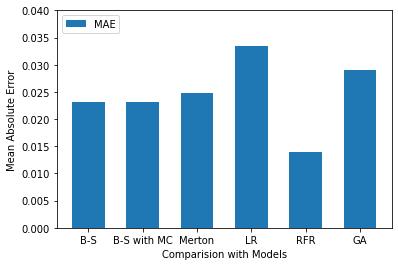

In [54]:
size = 6

x = np.arange(size)

# 有a/b两种类型的数据，n设置为2
total_width, n = 0.6, 1
# 每种类型的柱状图宽度
width = total_width / n


# 重新设置x轴的坐标
x = x - (total_width - width) / 2
plt.rcParams['font.serif'] = ['Times New Roman']
# 画柱状图
plt.bar(x + 0*width, MAE, width=width, label="MAE")
plt.xticks(np.arange(6), ('B-S', 'B-S with MC', 'Merton', 'LR', "RFR","GA"))
# 显示图例
# plt.figure(dpi=300,figsize=(24,24))
plt.legend(loc='upper left')
plt.xlabel("Comparision with Models")
plt.ylabel("Mean Absolute Error")
plt.ylim(0,0.04)
plt.savefig('./data/MAE.png', dpi=500)
# 显示柱状图
plt.show()

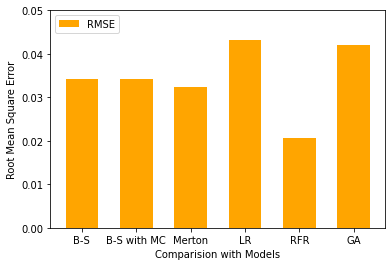

In [55]:
size = 6

x = np.arange(size)

# 有a/b两种类型的数据，n设置为2
total_width, n = 0.6, 1
# 每种类型的柱状图宽度
width = total_width / n


# 重新设置x轴的坐标
x = x - (total_width - width) / 2
plt.rcParams['font.serif'] = ['Times New Roman']
# 画柱状图
plt.bar(x + 0*width, RMSE, width=width, label="RMSE",color= "orange")
plt.xticks(np.arange(6), ('B-S', 'B-S with MC', 'Merton', 'LR', "RFR","GA"))
# 显示图例
# plt.figure(dpi=300,figsize=(24,24))
plt.legend(loc='upper left')
plt.xlabel("Comparision with Models")
plt.ylabel("Root Mean Square Error")
plt.ylim(0,0.05)
plt.savefig('./data/RMSE.png', dpi=500)
# 显示柱状图
plt.show()

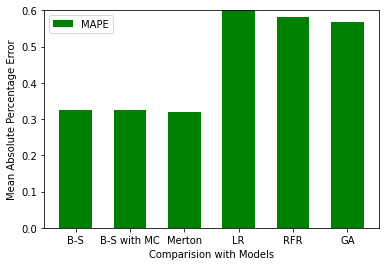

In [56]:
size = 6

x = np.arange(size)

# 有a/b两种类型的数据，n设置为2
total_width, n = 0.6, 1
# 每种类型的柱状图宽度
width = total_width / n


# 重新设置x轴的坐标
x = x - (total_width - width) / 2
plt.rcParams['font.serif'] = ['Times New Roman']
# 画柱状图
plt.bar(x + 0*width, MAPE, width=width, label="MAPE",color = 'green')
plt.xticks(np.arange(6), ('B-S', 'B-S with MC', 'Merton', 'LR', "RFR","GA"))
# 显示图例
# plt.figure(dpi=300,figsize=(24,24))
plt.legend(loc='upper left')
plt.xlabel("Comparision with Models")
plt.ylabel("Mean Absolute Percentage Error")
plt.ylim(0,0.6)
plt.savefig('./data/MAPE.png', dpi=500)
# 显示柱状图
plt.show()

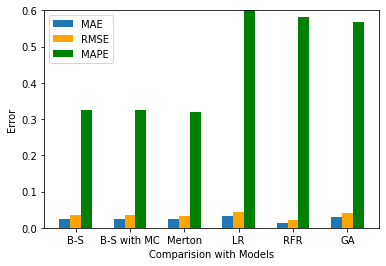

In [57]:
size = 6

x = np.arange(size)

# 有a/b两种类型的数据，n设置为2
total_width, n = 0.6, 3
# 每种类型的柱状图宽度
width = total_width / n


# 重新设置x轴的坐标
x = x - (total_width - width) / 2
plt.rcParams['font.serif'] = ['Times New Roman']
# 画柱状图
plt.bar(x, MAE, width=width, label="MAE" )
plt.bar(x + width, RMSE, width=width, label="RMSE",color = "orange")
plt.bar(x + 2*width, MAPE, width=width, label="MAPE",color = 'green')
plt.xticks(np.arange(6), ('B-S', 'B-S with MC', 'Merton', 'LR', "RFR","GA"))
# 显示图例
# plt.figure(dpi=300,figsize=(24,24))
plt.legend(loc='upper left')
plt.xlabel("Comparision with Models")
plt.ylabel("Error")
plt.ylim(0,0.6)
plt.savefig('./data/ERROR.png', dpi=500)
# 显示柱状图
plt.show()

In [58]:
df4 = df3.drop(["S","tau","T","rate"],axis=1)

t1 = np.array(df4[df4["K"] == 2.5][["Value","LRPrediction","RFPrediction"]])
t1 = t1[15:315:7]
t2 = np.array(df4[df4["K"] == 2.75][["Value","LRPrediction","RFPrediction"]])
t2 = t2[15:315:7]
t3 = np.array(df4[df4["K"] == 3.0][["Value","LRPrediction","RFPrediction"]])
t3 = t3[15:315:7]
t4 = np.array(df4[df4["K"] == 3.5][["Value","LRPrediction","RFPrediction"]])
t4 = t4[15:315:7]

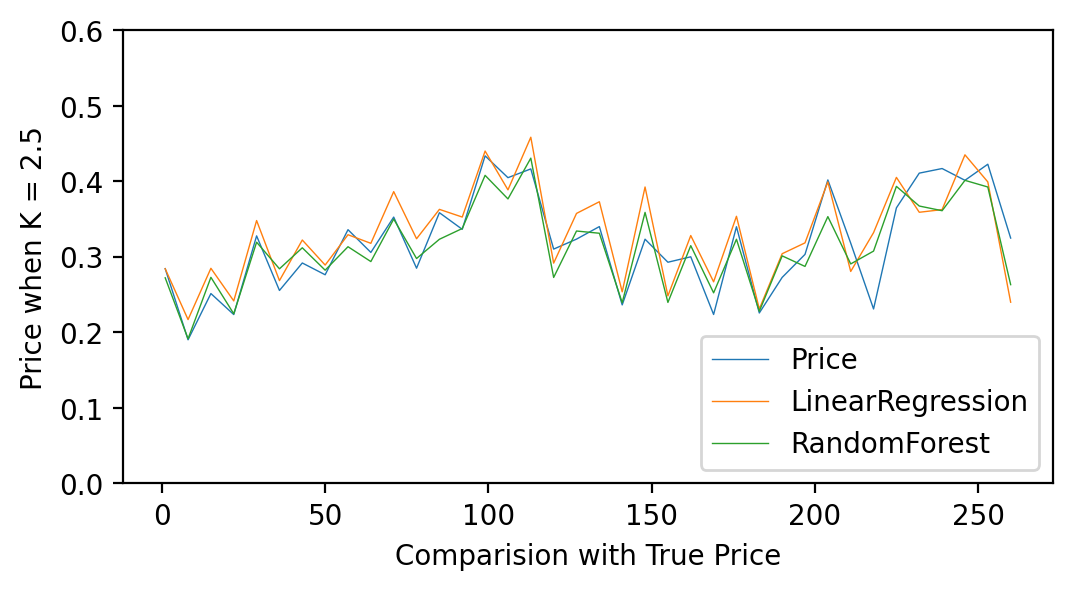

In [59]:

fig=plt.figure(figsize=(6,3),dpi=200)
x=list(np.arange(1,263,7))
plt.plot(x, t1.T[0],ls = "-",label="Price",linewidth=0.5)
plt.plot(x, t1.T[1],ls = "-",label="LinearRegression",linewidth = 0.5)
plt.plot(x, t1.T[2],ls = "-",label="RandomForest",linewidth = 0.5)
plt.ylim(0,0.6)
plt.xlabel("Comparision with True Price")
plt.ylabel("Price when K = 2.5")
plt.legend(loc="lower right")
#show出图形
plt.show()

#保存图片
fig.savefig("./data/行权价2500一年预测图")


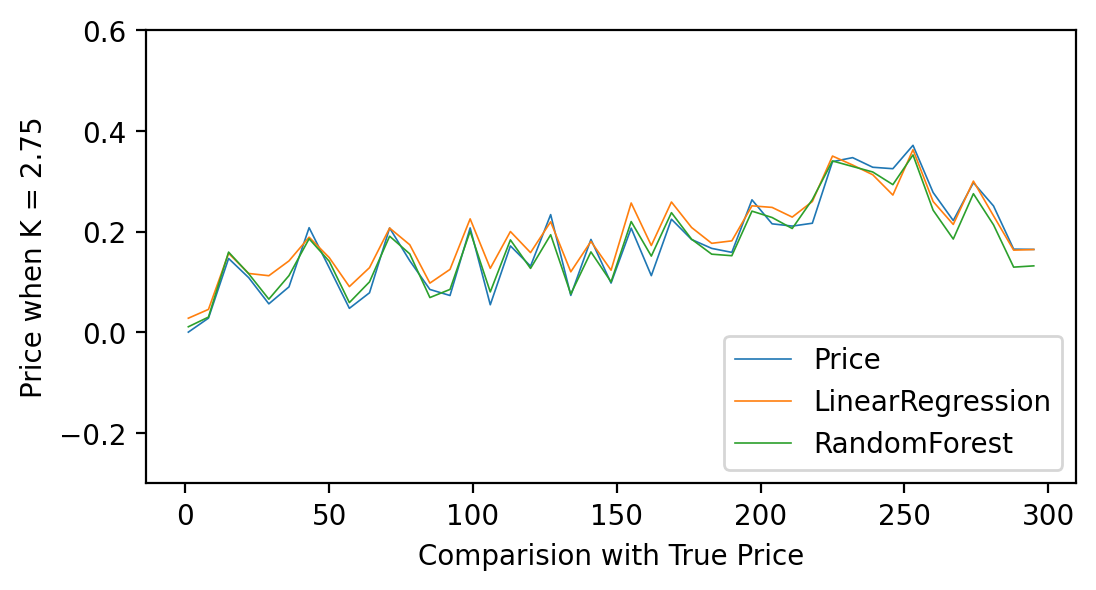

In [60]:
fig=plt.figure(figsize=(6,3),dpi=200)
x=list(np.arange(1,301,7))
plt.plot(x, t2.T[0],ls = "-",label="Price",linewidth=0.6)
plt.plot(x, t2.T[1],ls = "-",label="LinearRegression",linewidth = 0.6)
plt.plot(x, t2.T[2],ls = "-",label="RandomForest",linewidth = 0.6)
plt.ylim(-0.3,0.6)
plt.xlabel("Comparision with True Price")
plt.ylabel("Price when K = 2.75")
plt.legend(loc="lower right")
#show出图形
plt.show()

#保存图片
fig.savefig("./data/行权价2750一年预测图")

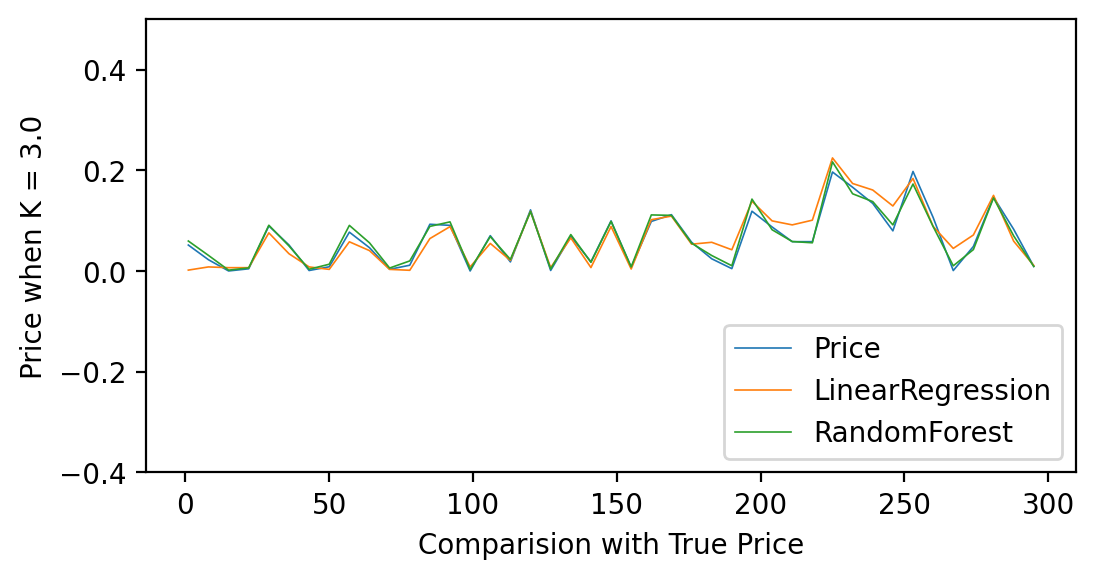

In [61]:
fig=plt.figure(figsize=(6,3),dpi=200)
x=list(np.arange(1,301,7))
plt.plot(x, t3.T[0],ls = "-",label="Price",linewidth=0.6)
plt.plot(x, t3.T[1],ls = "-",label="LinearRegression",linewidth = 0.6)
plt.plot(x, t3.T[2],ls = "-",label="RandomForest",linewidth = 0.6)
plt.ylim(-0.4,0.5)
plt.xlabel("Comparision with True Price")
plt.ylabel("Price when K = 3.0")
plt.legend(loc="lower right")
#show出图形
plt.show()

#保存图片
fig.savefig("./data/行权价3000一年预测图")

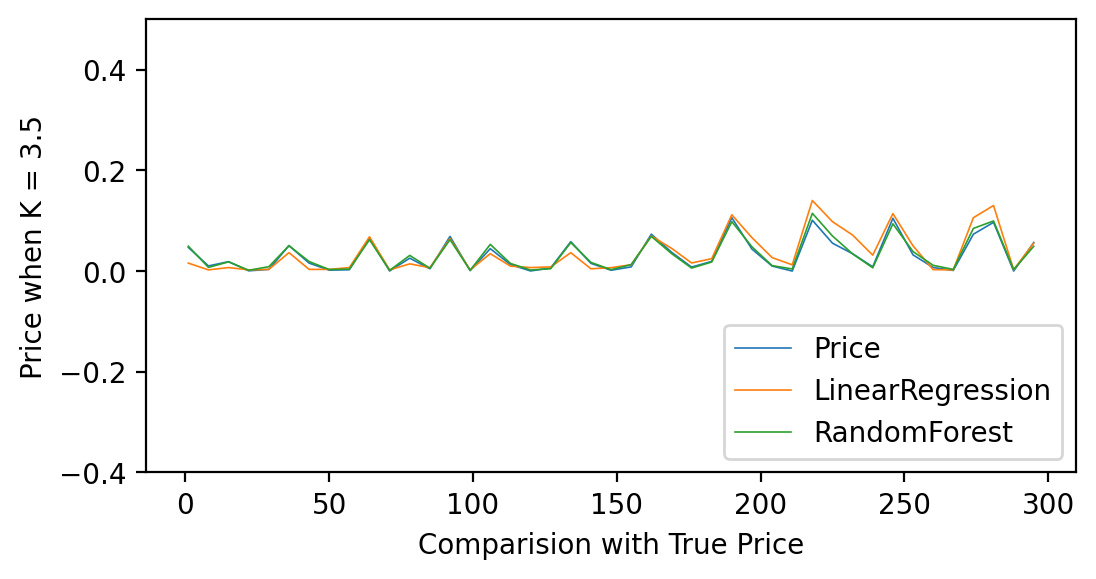

In [62]:
fig=plt.figure(figsize=(6,3),dpi=200)
x=list(np.arange(1,301,7))
plt.plot(x, t4.T[0],ls = "-",label="Price",linewidth=0.6)
plt.plot(x, t4.T[1],ls = "-",label="LinearRegression",linewidth = 0.6)
plt.plot(x, t4.T[2],ls = "-",label="RandomForest",linewidth = 0.6)
plt.ylim(-0.4,0.5)
plt.xlabel("Comparision with True Price")
plt.ylabel("Price when K = 3.5")
plt.legend(loc="lower right")
#show出图形
plt.show()

#保存图片
fig.savefig("./data/行权价3500一年预测图")

In [63]:
df4 = df3.drop(["S","tau","T","rate"],axis=1)

t1 = np.array(df4[df4["K"] == 2.5][["Value","LRPrediction","RFPrediction"]])
t1 = t1[15:22]
t2 = np.array(df4[df4["K"] == 2.75][["Value","LRPrediction","RFPrediction"]])
t2 = t2[15:22]
t3 = np.array(df4[df4["K"] == 3.0][["Value","LRPrediction","RFPrediction"]])
t3 = t3[15:22]
t4 = np.array(df4[df4["K"] == 3.5][["Value","LRPrediction","RFPrediction"]])
t4 = t4[15:22]

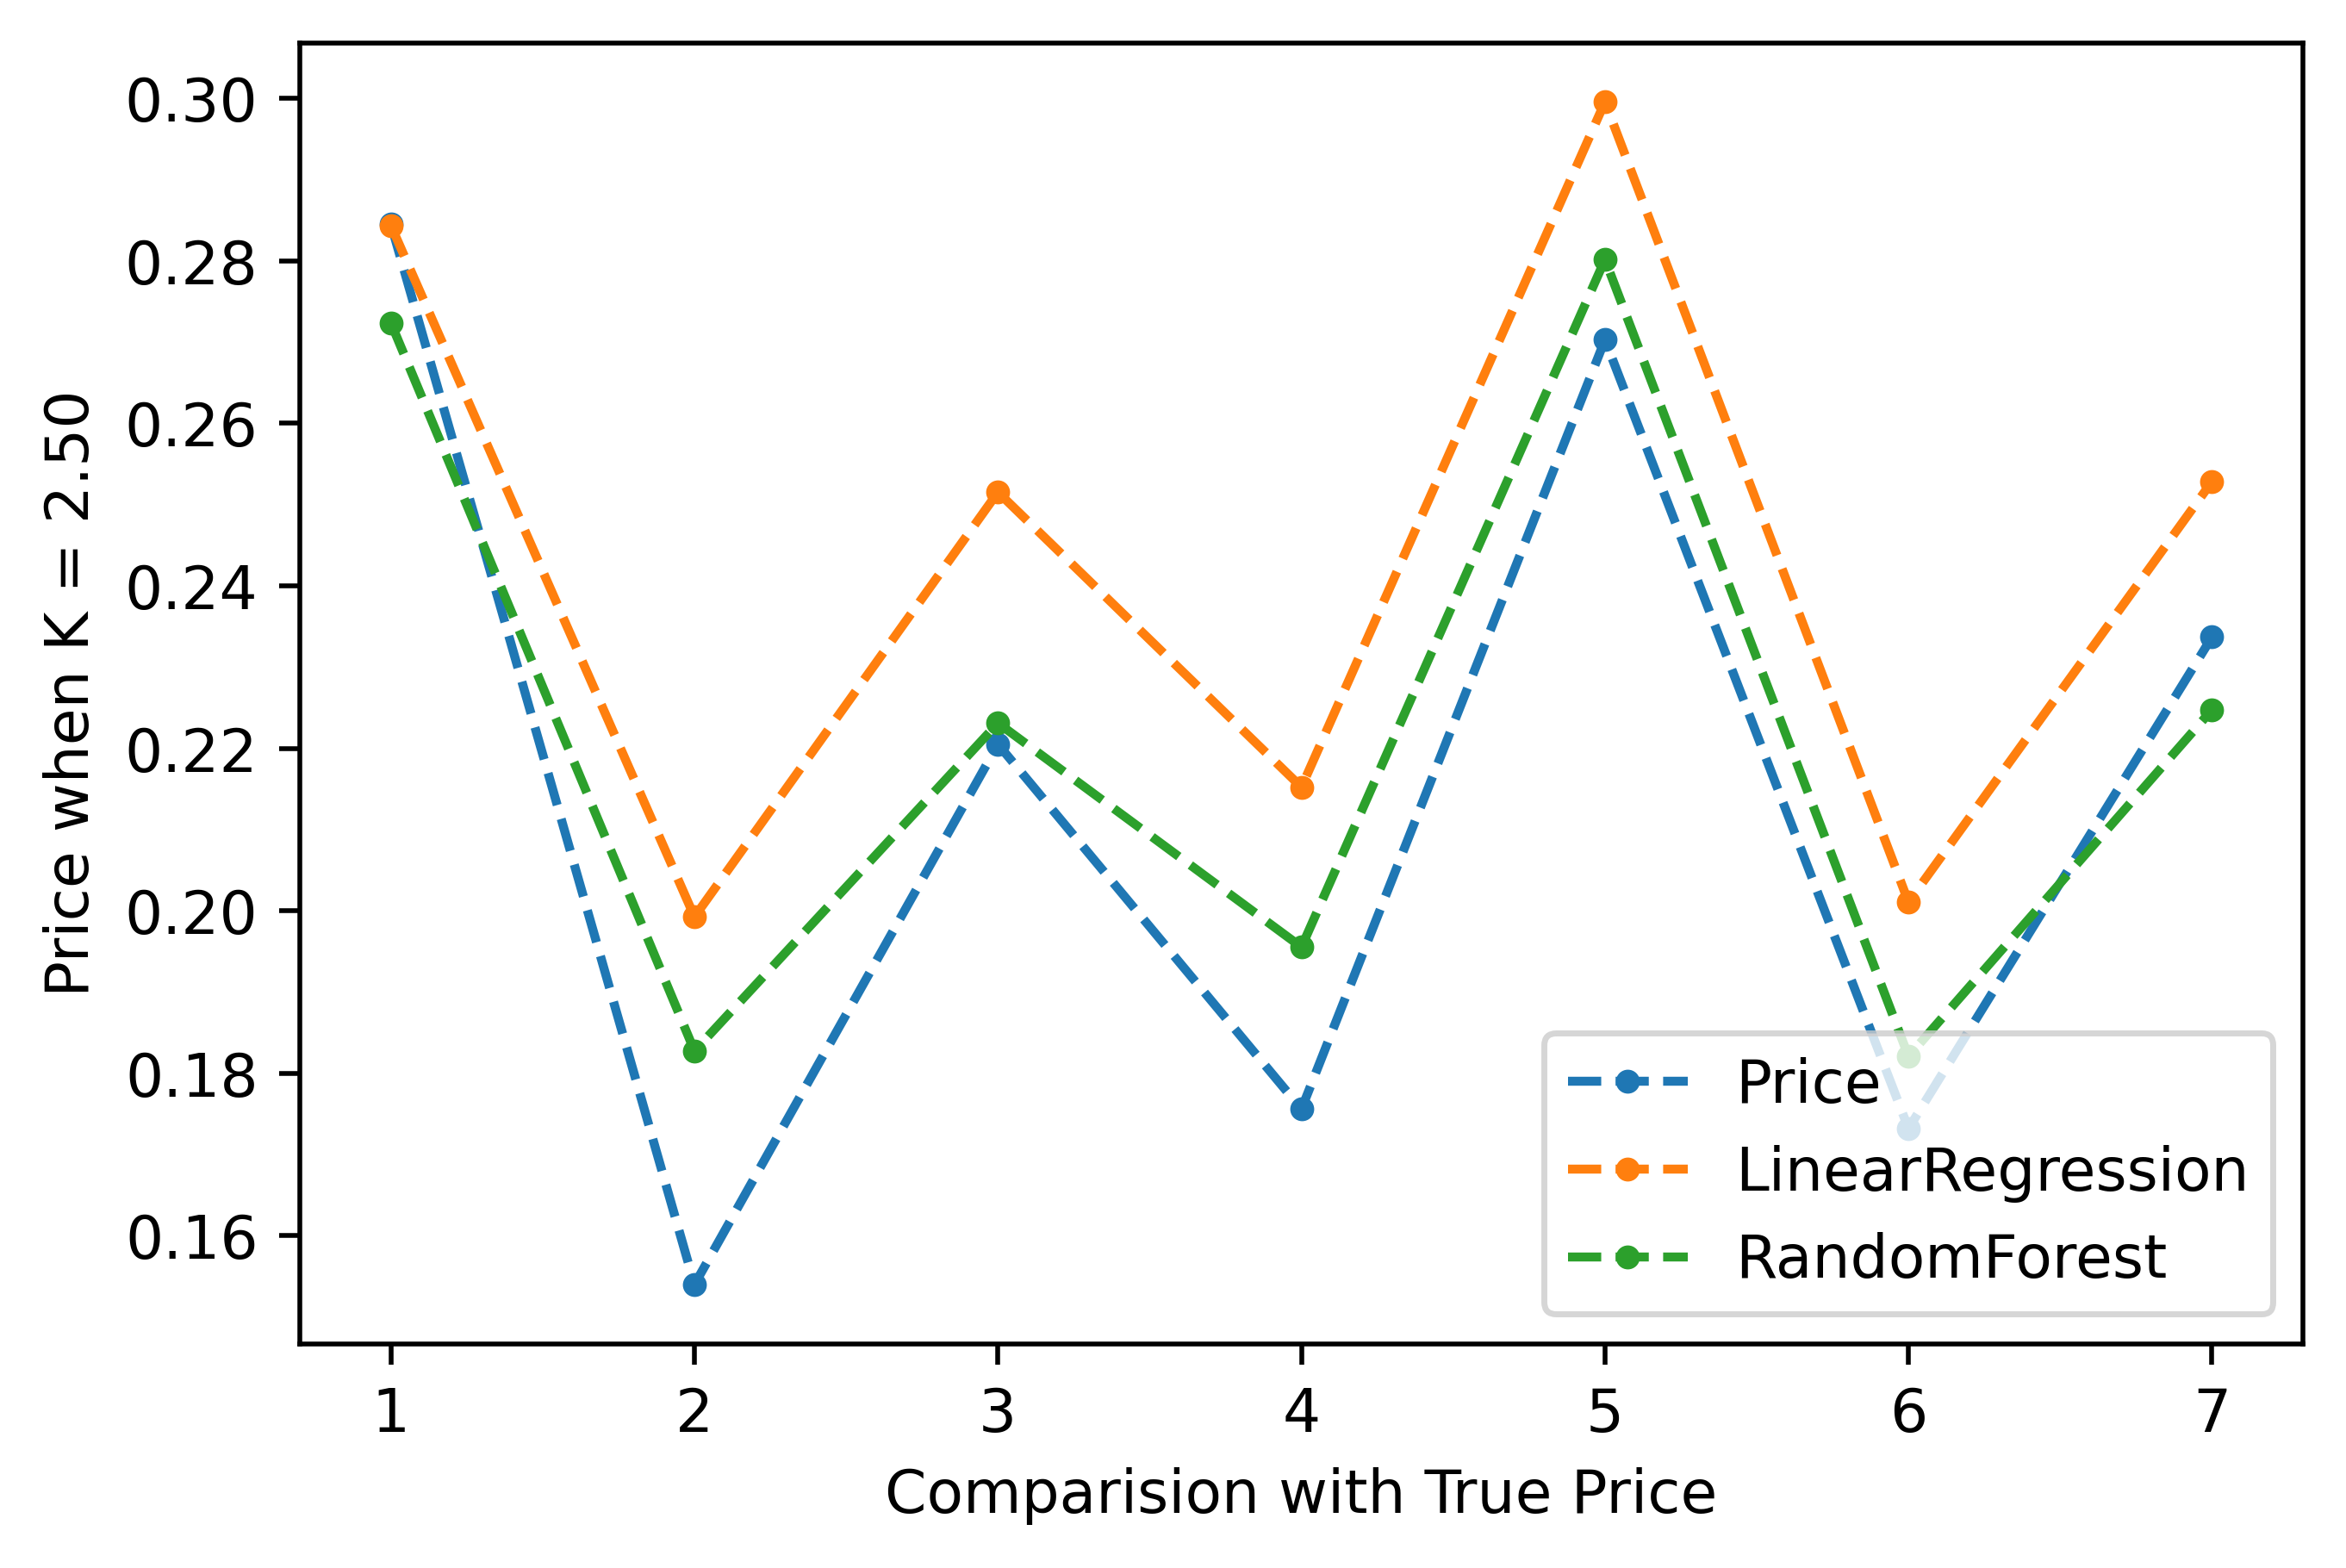

In [64]:
fig=plt.figure(dpi=500)
x=list(np.arange(1, 8))
plt.plot(x, t1.T[0],ls = "--",marker='.',label="Price")
plt.plot(x, t1.T[1],ls = "--",marker='.',label="LinearRegression")
plt.plot(x, t1.T[2],ls = "--",marker='.',label="RandomForest")
plt.xlabel("Comparision with True Price")
plt.ylabel("Price when K = 2.50")
plt.legend(loc="lower right")
#show出图形
plt.show()

#保存图片
fig.savefig("./data/行权价2500一周预测图")

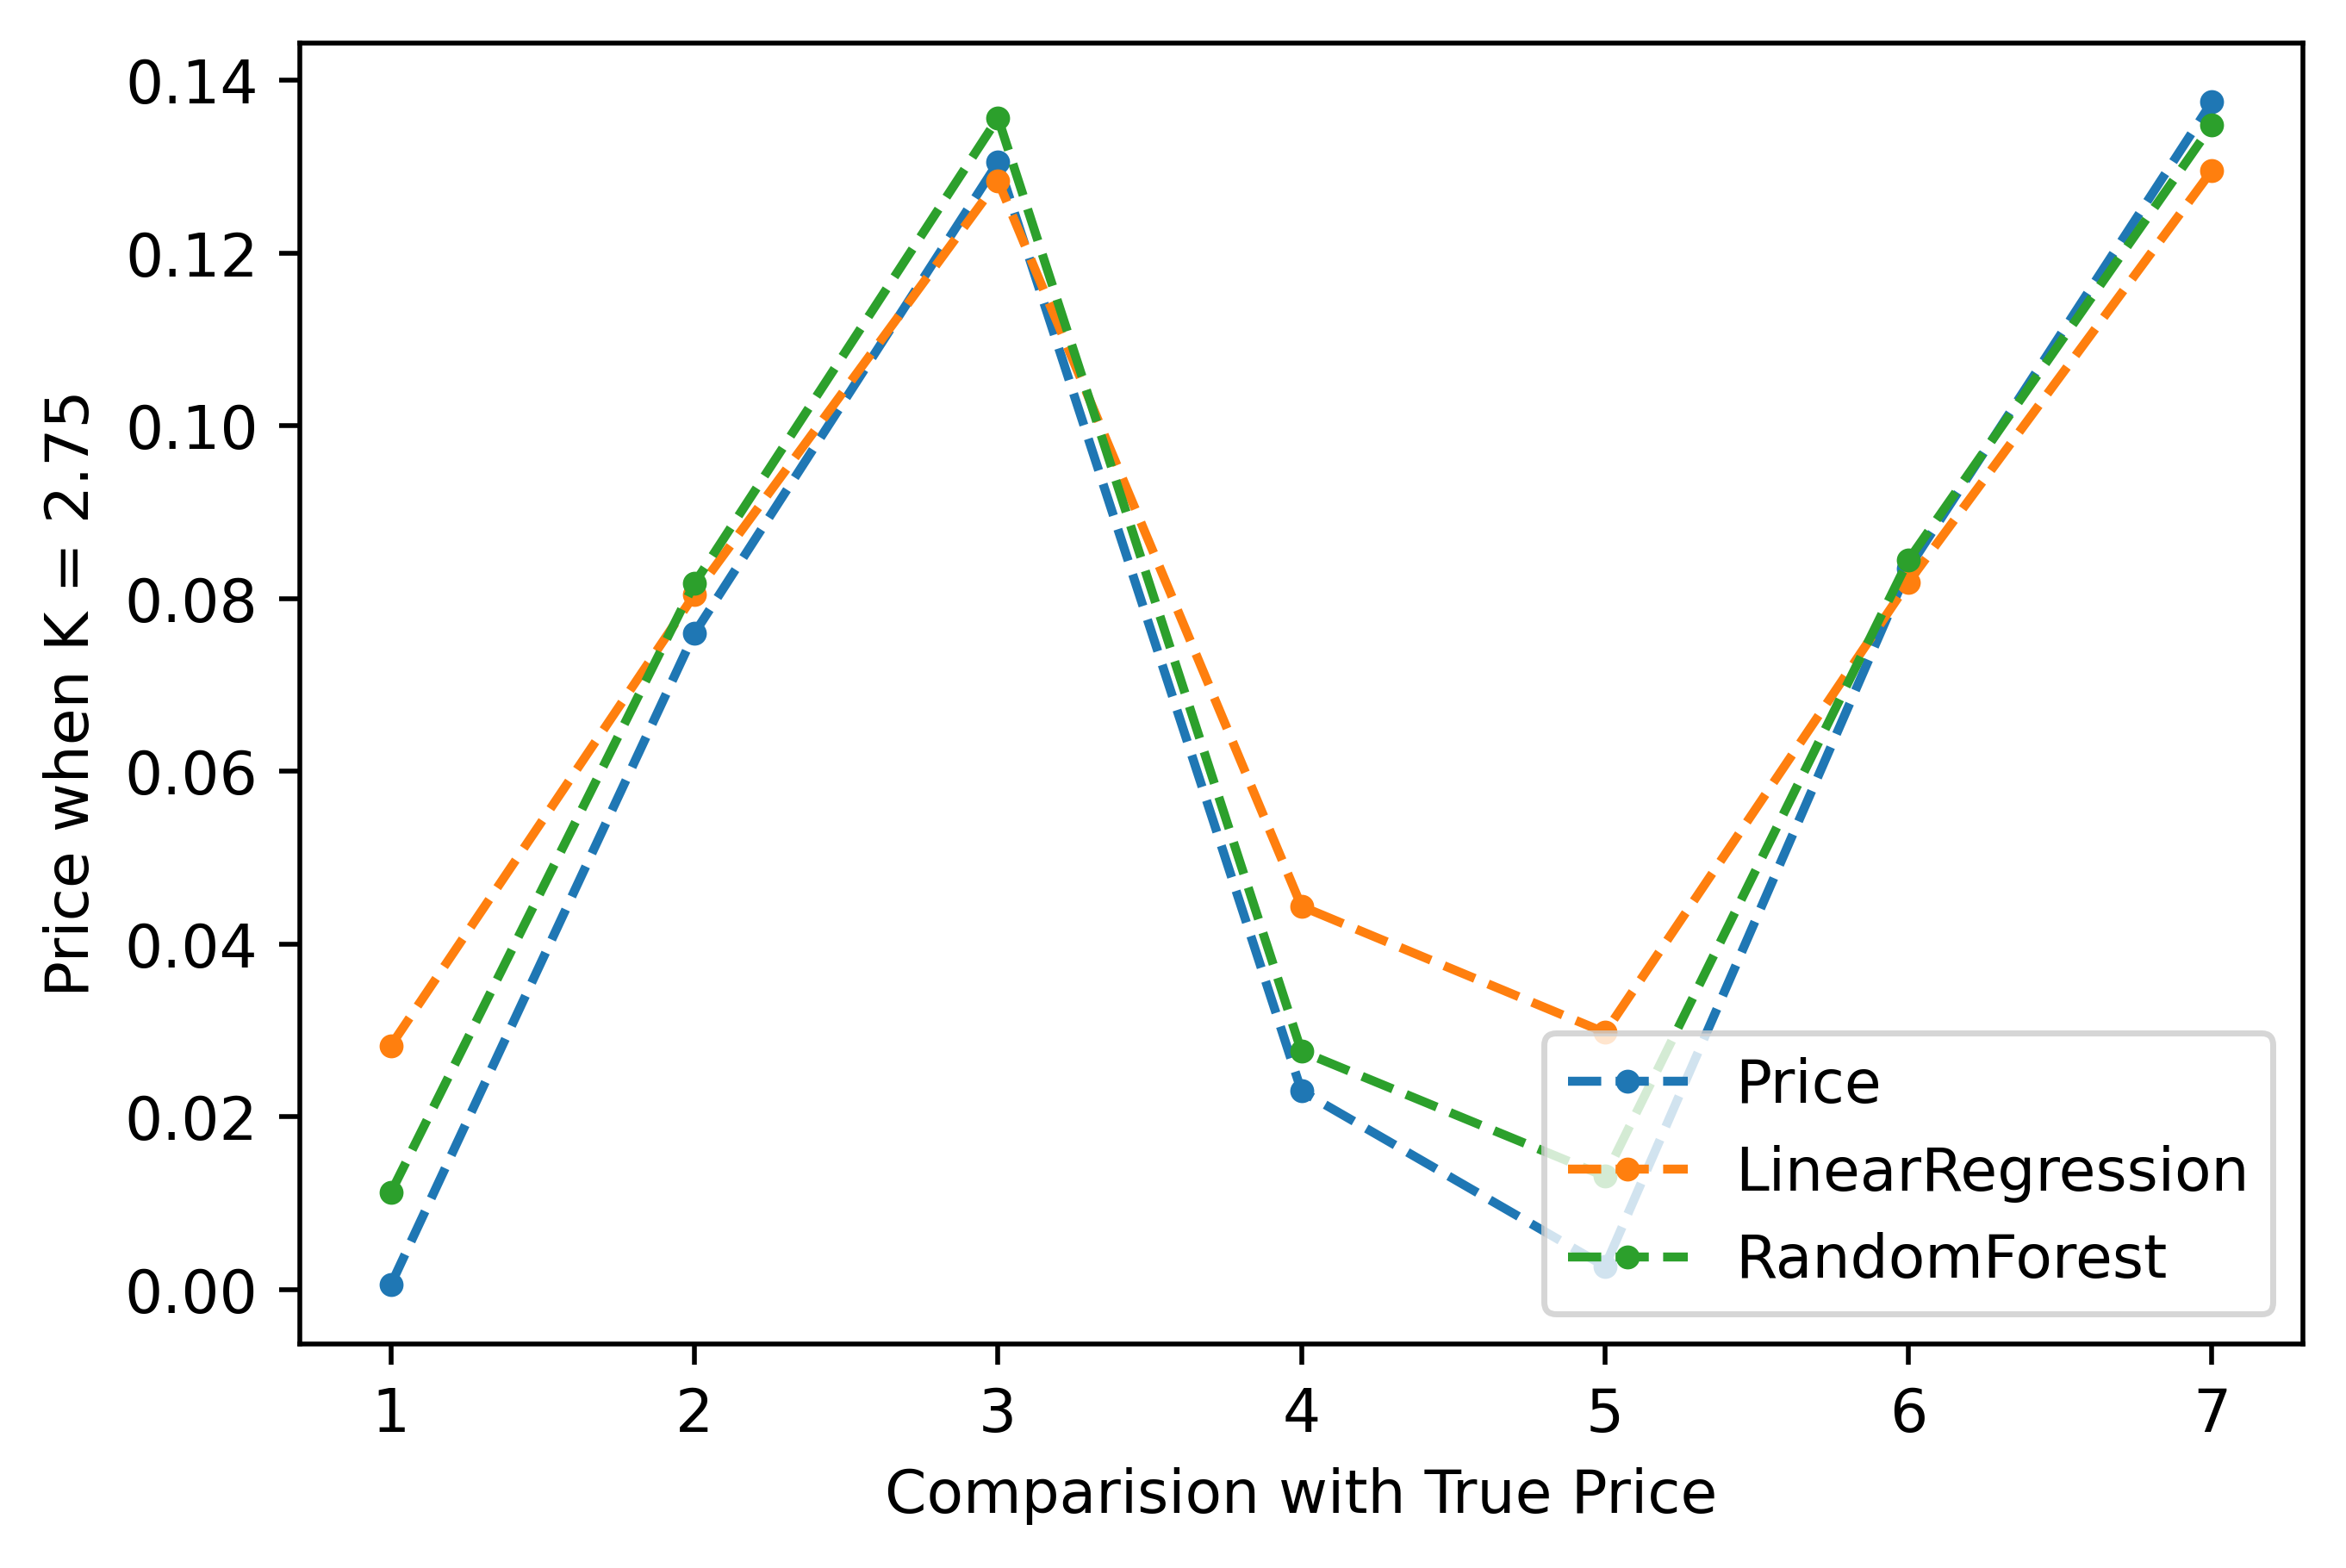

In [65]:
fig=plt.figure(dpi=500)
x=list(np.arange(1, 8))
plt.plot(x, t2.T[0],ls = "--",marker='.',label="Price")
plt.plot(x, t2.T[1],ls = "--",marker='.',label="LinearRegression")
plt.plot(x, t2.T[2],ls = "--",marker='.',label="RandomForest")
plt.xlabel("Comparision with True Price")
plt.ylabel("Price when K = 2.75")
plt.legend(loc="lower right")
#show出图形
plt.show()

#保存图片
fig.savefig("./data/行权价2750一周预测图")

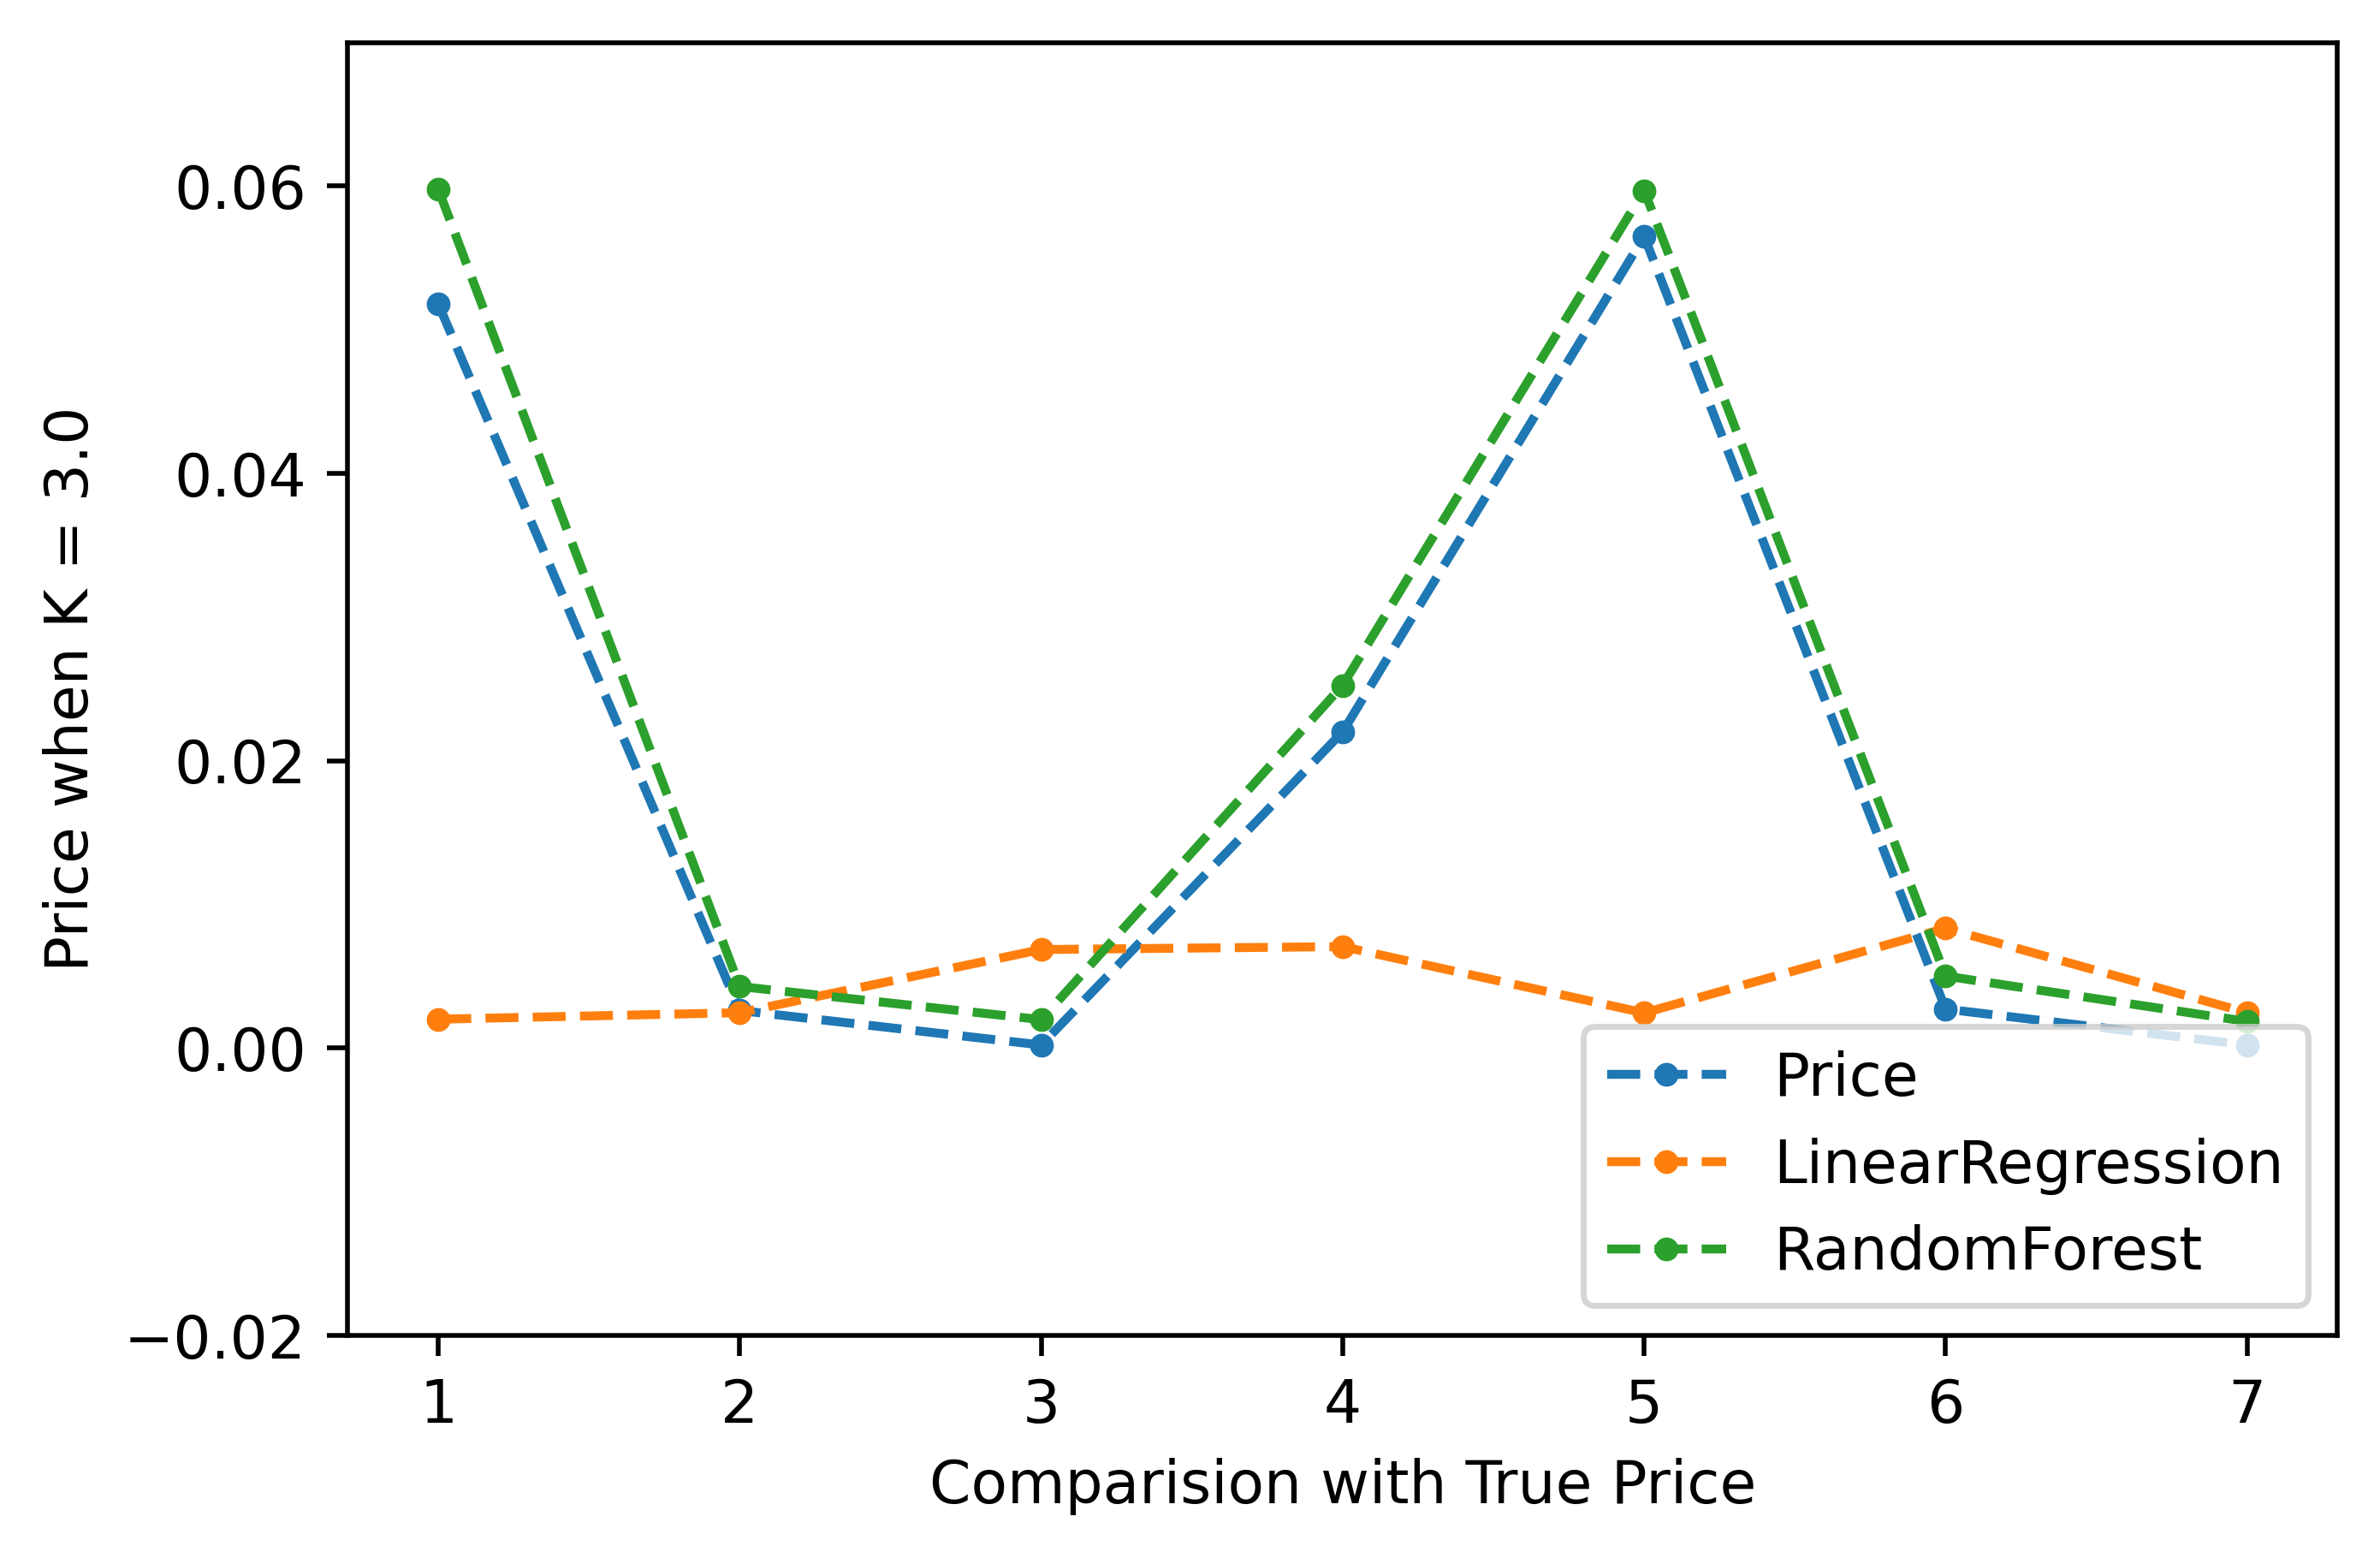

In [66]:
fig=plt.figure(dpi=500)
x=list(np.arange(1, 8))
plt.plot(x, t3.T[0],ls = "--",marker='.',label="Price")
plt.plot(x, t3.T[1],ls = "--",marker='.',label="LinearRegression")
plt.plot(x, t3.T[2],ls = "--",marker='.',label="RandomForest")
plt.xlabel("Comparision with True Price")
plt.ylabel("Price when K = 3.0")
plt.legend(loc="lower right")
plt.ylim(-0.02,0.07)
#show出图形
plt.show()

#保存图片
fig.savefig("./data/行权价3000一周预测图")

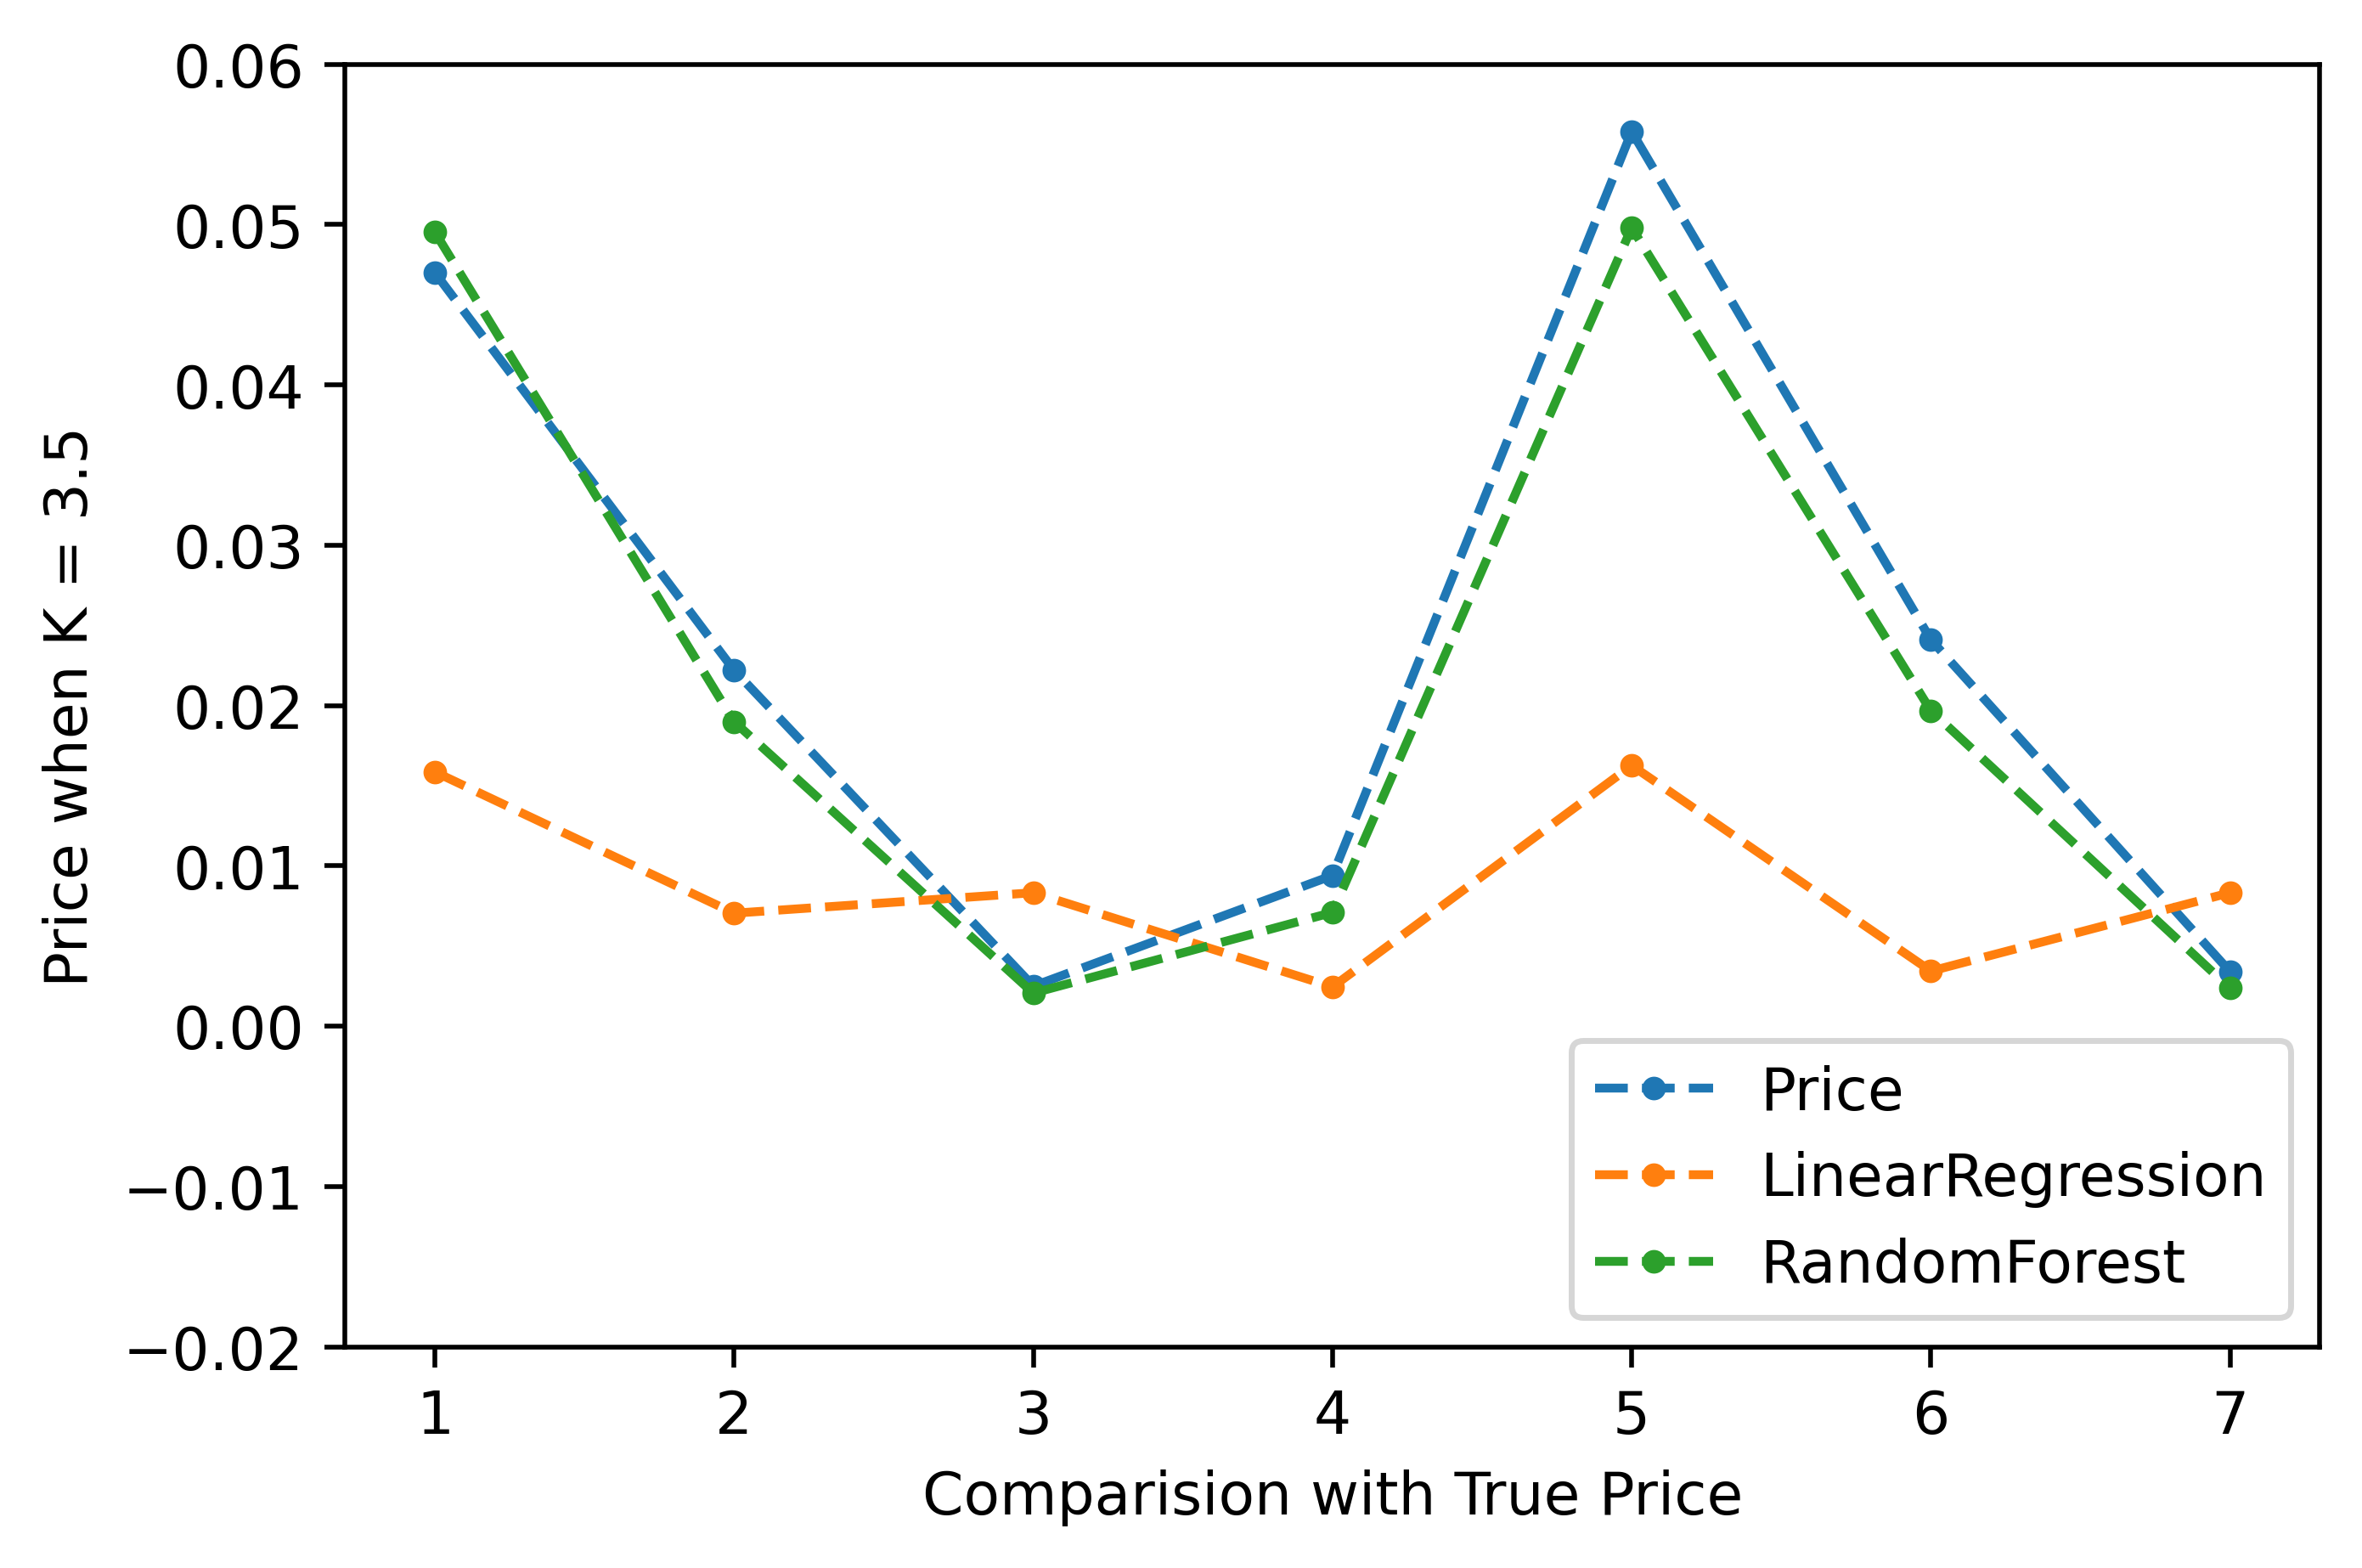

In [67]:
fig=plt.figure(dpi=500)
x=list(np.arange(1, 8))
plt.plot(x, t4.T[0],ls = "--",marker='.',label="Price")
plt.plot(x, t4.T[1],ls = "--",marker='.',label="LinearRegression")
plt.plot(x, t4.T[2],ls = "--",marker='.',label="RandomForest")
plt.xlabel("Comparision with True Price")
plt.ylabel("Price when K = 3.5")
plt.ylim(-0.02,0.06)
plt.legend(loc="lower right")
#show出图形
plt.show()

#保存图片
fig.savefig("./data/行权价3500一周预测图")